<a href="https://colab.research.google.com/github/cowsilver57/sessac_test/blob/main/11%EC%9B%94_14%EC%9D%BC_(%ED%99%94)_Day_49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Function1:
    def forward(self, x):
        z = x-2
        return z
    def backward(self, dy_dz):
        dz_dx = 1
        dy_dx = dz_dx * dy_dz
        return dy_dx

class Function2:
    def forward(self, z):
        self.z = z
        y = 2*self.z**2
        return y
    def backward(self):
        dy_dz = 4*self.z
        return dy_dz

class Function:
    def __init__(self):
        self.function1 = Function1()
        self.function2 = Function2()

    def forward(self, x):
        z = self.function1.forward(x)
        y = self.function2.forward(z)
        return y

    def backward(self):
        dy_dz = self.function2.backward()
        dy_dx = self.function1.backward(dy_dz)
        return dy_dx

function = Function()
x = 5
print(f"x: {x}")
y = function.forward(x)
print(f"y: {y}")
dy_dx = function.backward()
print(f"dy_dx: {dy_dx}")

x: 5
y: 18
dy_dx: 12


#Backpropagation 구현하기

1-1. affine객체를 생성할 때 w, b 랜덤으로 생성할 것

1-2. 값을 업데이트 하는 과정에서 learning rate 변수를 추가할 것

1-3. 예측값을 내는 그 자체가 파라미터 업데이트를 반복하면서 이루어지기 때문에 모델 클래스도 backward 메서드가 필요함

1-4. 모델은 affine + sigmoid 클래스로만 구성되어야 하며, 최종적으로 affine이 파라미터를 업데이트하는 형태

1-5. 즉 모델의 backward 메서드는 dJ_dpred, lr을 받아서 backward 연산을 수행하도록 구현할 것

In [ ]:
import numpy as np
#Backpropagation 구현하기

#A. Affine Function 구현하기
class AffineFunction:
    #1-1. 적용
    def __init__(self):
        #평균이 0이고, 표준편차가 1인 정규분포에서 무작위로 뽑은 숫자로 길이가 2인 배열 생성
        self.w = np.random.randn(2)
        self.b = np.random.randn()

    def forward(self,x):
        self.x = x
        z = np.dot(self.w,x) + self.b
        return z

    def backward(self, dJ_dz, lr):
        dz_dw = self.x
        dz_db = 1

        dJ_dw = dJ_dz * dz_dw
        dJ_db = dJ_dz * dz_db

        self.w = self.w - lr*dJ_dw
        self.b = self.b - lr*dJ_db
        return dJ_dw, dJ_db

#B. Sigmoid Function 구현하기
class Sigmoid:
    def forward(self,z):
        self.a = 1 / (1+np.exp(-z))
        return self.a

    def backward(self, dJ_dpred):
        da_dz = self.a * (1-self.a)
        dJ_dz = dJ_dpred * da_dz
        return dJ_dz

#C. Model 구현
class Model:
    def __init__(self):
        self.affine = AffineFunction()
        self.activation = Sigmoid()

    def forward(self,x):
        z = self.affine.forward(x)
        a = self.sigmoid.forward(z)
        return a
    #1-5. 적용 : 모델의 backward 메서드는 dJ_dpred, lr을 받아서 backward 연산을 수행하도록 구현할 것
    def backward(self, dJ_dpred, lr):
        dJ_dz = self.activation.backward(dJ_dpred)
        self.affine.backward(dJ_dz, lr)

#D. BCELoss 구현
class BCELoss:
    def forward(self, pred, y):
        self.pred = pred
        self.y = y
        J = -(y*np.log(pred) + (1-y)*np.log(1-pred))
        return J

    def backward(self):
        dJ_dpred = (self.pred-self.y)/(self.pred(1-self.pred))
        return dJ_dpred

#Neuron 학습시키기

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

N_SAMPLES = 100
LR = 0.001
#전체 학습 데이터셋을 훑는 횟수를 의미함. -> 30번 반복해서 학습
EPOCHS = 30

#make_blobs는 두 개의 클래스를 갖는 가상의 데이터셋을 생성하는 배열임.
X, y = make_blobs(n_samples=N_SAMPLES, centers=2, n_features=2, cluster_std=0.5, random_state=0)

#Instantiation : class의 object 생성
model = Model()
loss_function = BCELoss()

for epoch in range(EPOCHS):

    for X_, y_ in zip(X,y):
        #Training
        pred = model.forward(X_)
        loss = loss_function.forward(pred, y_)
        #Metrcis(loss, accuracy) Calculations:

AttributeError: ignored

[5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815, 5.004564360423815]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


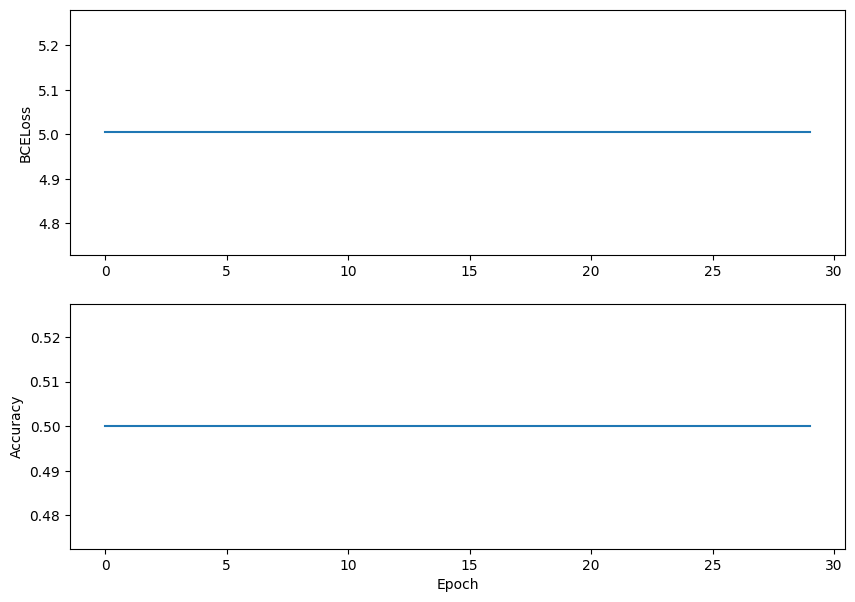

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

class AffineFunction:
    def __init__(self):
        self.w = np.random.randn(2)
        self.b = np.random.randn()

    def forward(self, x):
        self.x = x
        z = np.dot(self.w, x) + self.b
        return z

    def backward(self, dJ_dz, lr):
        dz_dw = self.x
        dz_db = 1

        dJ_dw = dJ_dz * dz_dw
        dJ_db = dJ_dz * dz_db

        self.w = self.w - lr * dJ_dw
        self.b = self.b - lr * dJ_db

class SigmoidFunction:
    def forward(self, z):
        self.a = 1 / (1 + np.exp(-z))
        return self.a

    def backward(self, dJ_dpred):
        da_dz = self.a * (1 - self.a)
        dJ_dz = dJ_dpred * da_dz
        return dJ_dz

class Model:
    def __init__(self):
        self.affine = AffineFunction()
        self.activation = SigmoidFunction()

    def forward(self, x):
        z = self.affine.forward(x)
        pred = self.activation.forward(z)
        return pred

    def backward(self, dJ_dpred, lr):
        dJ_dz = self.activation.backward(dJ_dpred)
        self.affine.backward(dJ_dz, lr)

class BCELoss:
    def forward(self, pred, y):
        self.pred = pred
        self.y = y
        J = -(y * np.log(pred) + (1 - y) * np.log(1 - pred))
        return J

    def backward(self):
        dJ_dpred = (self.pred - self.y) / (self.pred * (1 - self.pred))
        return dJ_dpred

N_SAMPLES = 100
LR = 0.001
EPOCHS = 30

X, y = make_blobs(n_samples=N_SAMPLES,
                  centers=2,
                  n_features=2,
                  cluster_std=0.5,
                  random_state=0)

model = Model()
loss_function = BCELoss()

loss_list = []
accuracy_list = []

for epoch in range(EPOCHS):
    correct_predictions = 0
    total_loss = 0

    for X_, y_ in zip(X, y):
        pred = model.forward(X_)
        loss = loss_function.forward(pred, y_)

        # Accuracy 계산
        predicted_label = 1 if pred > 0.5 else 0
        correct_predictions += (predicted_label == y_)

        # Loss 계산
        total_loss += loss

    epoch_loss = total_loss / N_SAMPLES
    epoch_accuracy = correct_predictions / N_SAMPLES

    # 빈 리스트에 추가하기
    loss_list.append(epoch_loss)
    accuracy_list.append(epoch_accuracy)

print(loss_list)
print(accuracy_list)

# 시각화 하기
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 7))

axes[0].plot(range(EPOCHS), loss_list)
axes[0].set_ylabel('BCELoss')

axes[1].plot(range(EPOCHS), accuracy_list)
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')

plt.show()


[0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052, 0.7800696270986052]
[0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54]


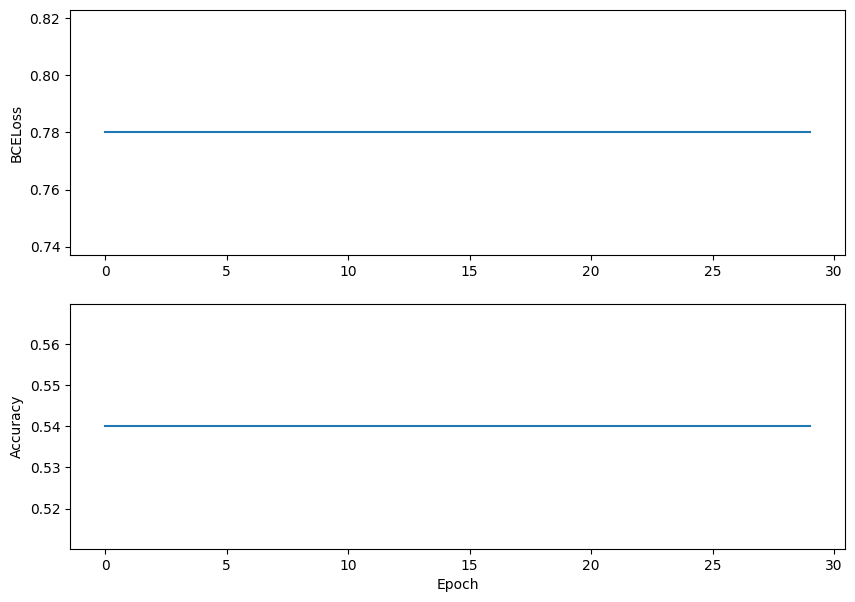

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

class AffineFunction:
    def __init__(self):
        self.w = np.random.randn(2)
        self.b = np.random.randn()

    def forward(self, x):
        self.x = x
        z = np.dot(self.w, x) + self.b
        return z

    def backward(self, dJ_dz, lr):
        dz_dw = self.x
        dz_db = 1

        dJ_dw = dJ_dz * dz_dw
        dJ_db = dJ_dz * dz_db

        self.w = self.w - lr * dJ_dw
        self.b = self.b - lr * dJ_db

class SigmoidFunction:
    def forward(self, z):
        self.a = 1 / (1 + np.exp(-z))
        return self.a

    def backward(self, dJ_dpred):
        da_dz = self.a * (1 - self.a)
        dJ_dz = dJ_dpred * da_dz
        return dJ_dz

class Model:
    def __init__(self):
        self.affine = AffineFunction()
        self.activation = SigmoidFunction()

    def forward(self, x):
        z = self.affine.forward(x)
        pred = self.activation.forward(z)
        return pred

    def backward(self, dJ_dpred, lr):
        dJ_dz = self.activation.backward(dJ_dpred)
        self.affine.backward(dJ_dz, lr)

class BCELoss:
    def forward(self, pred, y):
        self.pred = pred
        self.y = y
        J = -(y * np.log(pred) + (1 - y) * np.log(1 - pred))
        return J

    def backward(self):
        dJ_dpred = (self.pred - self.y) / (self.pred * (1 - self.pred))
        return dJ_dpred

N_SAMPLES = 100
LR = 0.001
EPOCHS = 30

X, y = make_blobs(n_samples=N_SAMPLES,
                  centers=2,
                  n_features=2,
                  cluster_std=0.5,
                  random_state=0)

model = Model()
loss_function = BCELoss()

loss_list = []
accuracy_list = []

for epoch in range(EPOCHS):
    correct_predictions = 0
    total_loss = 0

    for X_, y_ in zip(X, y):
        pred = model.forward(X_)
        loss = loss_function.forward(pred, y_)

        # Accuracy 계산
        predicted_label = 1 if pred > 0.5 else 0
        correct_predictions += (predicted_label == y_)

        # Loss 계산
        total_loss += loss

    # 에폭이 끝나면 손실과 정확도의 평균을 계산
    epoch_loss = total_loss / N_SAMPLES
    epoch_accuracy = correct_predictions / N_SAMPLES

    # 빈 리스트에 추가하기
    loss_list.append(epoch_loss)
    accuracy_list.append(epoch_accuracy)

print(loss_list)
print(accuracy_list)

# 시각화 하기
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 7))

axes[0].plot(range(EPOCHS), loss_list)
axes[0].set_ylabel('BCELoss')

axes[1].plot(range(EPOCHS), accuracy_list)
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')

plt.show()


In [ ]:
losses, accs = [], []
for epoch in range(EPOCHS):
  epoch_loss, n_corrects = 0., 0
  for X_, y_ in zip(X, y):
    pred = model.forward(X_)
    loss = loss_function.forward(pred, y_)
    dJ_dpred = loss_function.backward()
    model.backward(dJ_dpred, LR)
    epoch_loss += loss
    n_corrects += int((pred > 0.5) == y_)
  epoch_loss /= N_SAMPLES
  epoch_acc = n_corrects / N_SAMPLES
  losses.append(epoch_loss)
  accs.append(epoch_acc)
  print(f"Epoch: {epoch + 1}")
  print(f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}\n")